# Assignment 2 : ECE 657A

The approach used is :
1. First all the expermentation and observation is related to Abalone Dataset.
2. Second part contains the expermentation and observations of Wine Dataset.

# Abalone data

Importing the required libraries

In [253]:
 # libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [254]:
# From the above description of the Abalone dataset. 
# Let's define the column names of the feature variables and the name of the target variable

feature_columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
target_column = ['Rings']
ordinal_column = ['Sex']
feature_columns_without_ordinal_column = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

In [255]:
# Reading the csv data 
abalone_data = pd.read_csv("abalone.csv")

In [256]:
# Seems like the column names (feature names) are missing, let's add them 
column_names_abalone_data = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data.columns = column_names_abalone_data

In [257]:
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


The `Sex` column contains ordinal data. So the encoding is done, Males = 0, Females = 1 & Infants = 2.

In [258]:
abalone_data_sex_column = abalone_data['Sex']
for i in range(0, len(abalone_data_sex_column)):
    if abalone_data_sex_column[i] == 'M':
        abalone_data_sex_column[i] = 0
    elif abalone_data_sex_column[i] == 'F':
        abalone_data_sex_column[i] = 1
    else:
        abalone_data_sex_column[i] = 2
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Applying MinMax Normalisation on the abalone data.

In [259]:
#Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(abalone_data.drop(columns=['Rings'], axis=1))

In [260]:
minmax_abalone_data = pd.DataFrame(scaled_data) 
minmax_abalone_data.columns = feature_columns
minmax_abalone_data[target_column] = abalone_data[target_column]
minmax_abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,7
1,0.5,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,9
2,0.0,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,10
3,1.0,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,7
4,1.0,0.472973,0.411765,0.084071,0.123783,0.094149,0.101382,0.118087,8
...,...,...,...,...,...,...,...,...,...
4171,0.5,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,11
4172,0.0,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,10
4173,0.0,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,9
4174,0.5,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,10


In [261]:
#Splitting into feature matrix and target vector
X = minmax_abalone_data.drop('Rings', axis=1)
y = minmax_abalone_data['Rings']


# 1. Representation Learning


To analyse the resulting new representations in term of interpretability :

We reduce the dataset with the help of 2 techniques:

1. PCA (Principal Component Analysis)

2. LDA (Linear Discriminat Analysis)

**PCA** is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The `i-th` principal component can be taken as a direction orthogonal to the first `i-1` principal components that maximizes the variance of the projected data [Source : Wikipedia].



# 1.1 Applying PCA on the abalone dataset, for 2 Principal Components.

In [262]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)


In [263]:
X_pca = pca.fit_transform(X)

Let's check the variance explained by the first two principal components.

In [264]:
pca.explained_variance_ratio_

array([0.71662189, 0.2540896 ])

Visualising the 2-Principal Components.

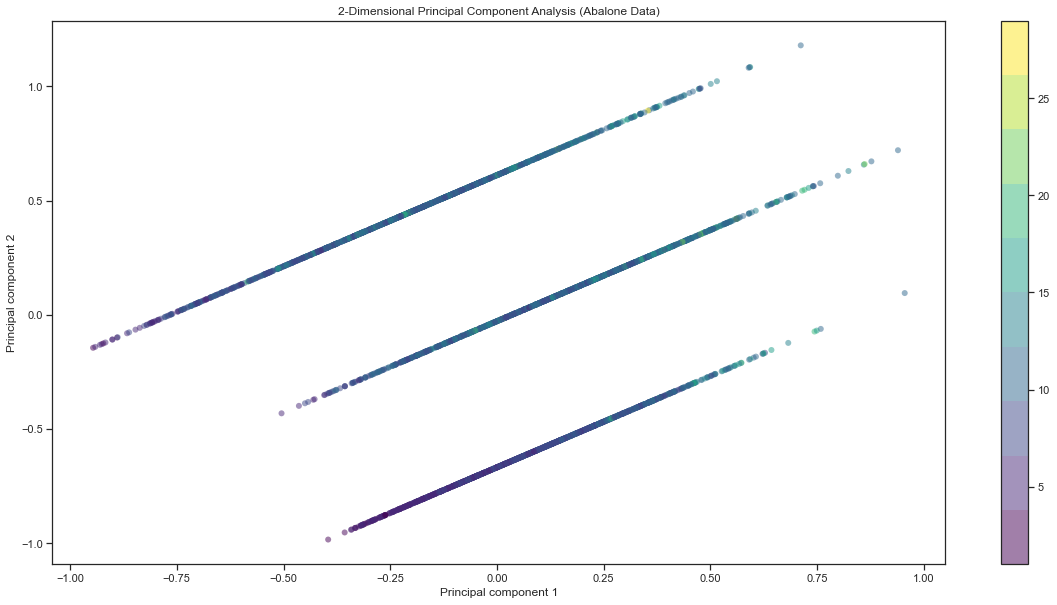

In [265]:
plt.figure(figsize=(20,10))
plt.scatter(X_pca[:, 1], X_pca[:, 0],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar();
plt.title('2-Dimensional Principal Component Analysis (Abalone Data)');

Here, we observe that there is large variance accross Principal Component 1 compared to Principal Component 2. We can also notice that as the value of Principal Components 1 and 2 increase the age of abalones also increase. Younger abalone lies within the smaller values of Principal Components.

### 1.1 Applying LDA


**LDA** is a supervised machine learning method that is used to separate two groups/classes. The main idea of linear discriminant analysis(LDA) is to maximize the separability between the two groups so that we can make the best decision to classify them. LDA is like PCA which helps in dimensionality reduction, but it focuses on maximizing the separability among known categories by creating a new linear axis and projecting the data points on that axis [https://medium.com/analytics-vidhya/pca-vs-lda-vs-t-sne-lets-understand-the-difference-between-them-22fa6b9be9d0].

In [278]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

Applying LDA on the abalone dataset, for 2 Principal Components.

In [279]:
lda=LinearDiscriminantAnalysis(n_components=2)
X_lda=lda.fit_transform(X,y)


Visualising the 2-Principal Components after applying LDA.

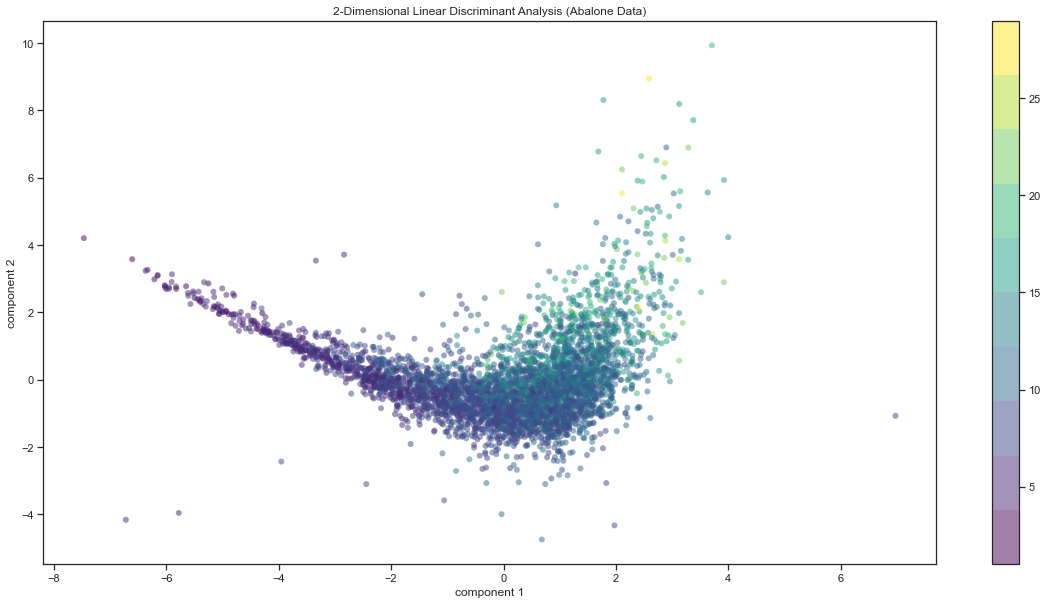

In [280]:
plt.figure(figsize=(20,10))
plt.scatter(X_lda[:, 0], X_lda[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
plt.title('2-Dimensional Linear Discriminant Analysis (Abalone Data)');

Here, we can observe that for greater values of Component 1, the age of abalones increases. Even along the Component 2 the age of abalones increase with the increase in the value of Component 2.

# 1.1 T-SNE

**T-SNE** is an unsupervised machine learning method that is used to visualize the higher dimensional data in low dimensions. T-SNE is used for designing/implementation and can bring down any number of feature space into 2-D feature space.
Both PCA and LDA are used for visualization and dimensionality reduction but T-SNE is specifically used for visualization purposes only. It is well suited for the visualization of high-dimensional datasets.
Unlike PCA and LDA, T-SNE is a non-linear data visualizer. It means it doesn’t form a linear line to separate the classes or to calculate the variance and it doesn’t use any norm or distance metric to calculate the distance between points [https://medium.com/analytics-vidhya/pca-vs-lda-vs-t-sne-lets-understand-the-difference-between-them-22fa6b9be9d0].


In [269]:
import time
from sklearn.manifold import TSNE

In [270]:
# Applying t-SNE to visualise data into two dimensions
np.random.seed(27)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, n_iter=300, perplexity=40)
X_tsne = tsne.fit_transform(X)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4176 samples in 0.002s...
[t-SNE] Computed neighbors for 4176 samples in 0.175s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4176
[t-SNE] Computed conditional probabilities for sample 2000 / 4176
[t-SNE] Computed conditional probabilities for sample 3000 / 4176
[t-SNE] Computed conditional probabilities for sample 4000 / 4176
[t-SNE] Computed conditional probabilities for sample 4176 / 4176
[t-SNE] Mean sigma: 0.030437
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.115833
[t-SNE] KL divergence after 300 iterations: 1.325995


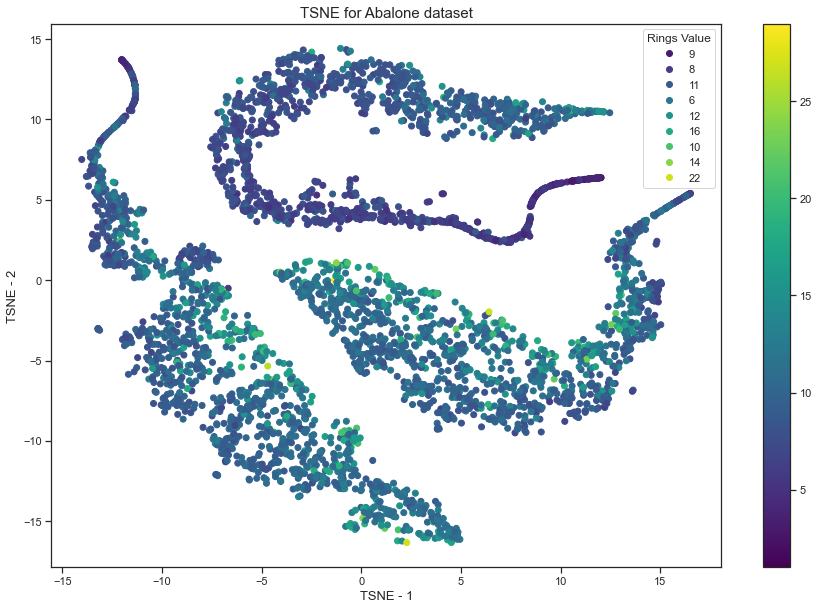

In [271]:
np.random.seed(27)
plt.figure(figsize=(15,10))
target = [ 9,  8, 11,  6, 12, 16, 10, 14, 22,  7, 15, 13,  3, 19, 17, 21, 18, 4, 5, 20, 26, 23, 24, 25,  2, 29, 27,  1]
temp = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis')
plt.xlabel('TSNE - 1',fontsize=13)
plt.ylabel('TSNE - 2',fontsize=13)
plt.title("TSNE for Abalone dataset",fontsize=15)
plt.legend(handles=temp.legend_elements()[0], title="Rings Value", labels=target);
plt.colorbar();

Here, we can observe that on the upper most part, the younger Abalones are concentrated. Whereas there is almost equal type of distribution of abalone fishes of different ages on the downward left and right clusters.

# 1.2 Produce a scree-plot to look at the cumulative variance represented by the PCA eigenvectors.

In [272]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=8)

In [273]:
X_pca = pca1.fit_transform(X)
cumsum = np.cumsum(pca1.explained_variance_ratio_)

In [274]:
pca1.explained_variance_ratio_

array([7.16621887e-01, 2.54089601e-01, 1.46210486e-02, 7.53798778e-03,
       4.30781739e-03, 1.20128236e-03, 1.06021813e-03, 5.60157760e-04])

In [275]:
variance = pca1.explained_variance_ratio_
cumsum

array([0.71662189, 0.97071149, 0.98533254, 0.99287052, 0.99717834,
       0.99837962, 0.99943984, 1.        ])

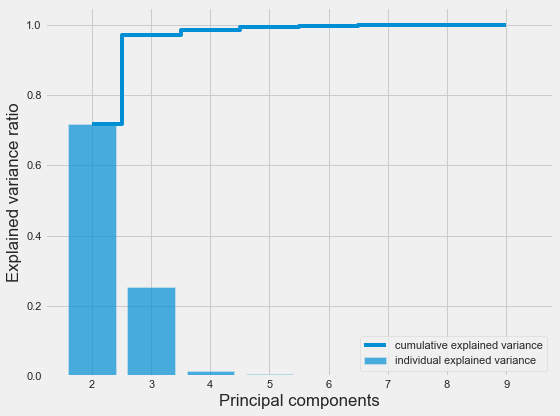

In [276]:
#Plot variance explained by the principal components
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8, 6))
    plt.bar(range(2,10), variance, alpha=0.7, align='center',
            label='individual explained variance')
    plt.step(range(2,10),cumsum, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout();

Here, we can observe that first 2 Principal components are able to explain more than 95% of the variance in the data. Whereas other principal components doesn't add much to explain the variance of the data.

Scree-plot that shows variance explained by each individual principal component.

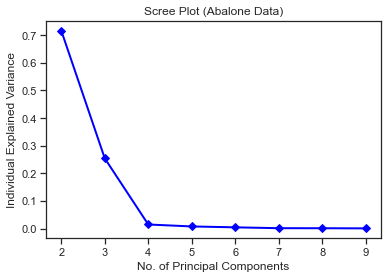

In [277]:
plt.plot(range(2,10), variance, 'D-', linewidth=2, color='blue')
plt.title('Scree Plot (Abalone Data)')
plt.xlabel('No. of Principal Components')
plt.ylabel('Individual Explained Variance')
plt.show()

# 1.3 Accuracy vs Dimensions

Let's find the best reduced dimensionality for the dataset with respect to how it impacts the accuracy of a kNN classifier. the best one found from asg1, one of the weighted versions using a normalized dataset has following parameters. 

The best parameters found from previous assignment are : 
##### {'leaf_size': 15, 'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}

In [29]:
minmax_abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,7
1,0.5,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,9
2,0.0,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,10
3,1.0,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,7
4,1.0,0.472973,0.411765,0.084071,0.123783,0.094149,0.101382,0.118087,8
...,...,...,...,...,...,...,...,...,...
4171,0.5,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637,11
4172,0.0,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097,10
4173,0.0,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431,9
4174,0.5,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473,10


For abalone-raw we will use the MinMax scaled abalone data.

In [30]:
X_raw = minmax_abalone_data.drop(['Rings'], axis=1)
X_raw

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.0,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261
1,0.5,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773
2,0.0,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965
3,1.0,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313
4,1.0,0.472973,0.411765,0.084071,0.123783,0.094149,0.101382,0.118087
...,...,...,...,...,...,...,...,...
4171,0.5,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637
4172,0.0,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097
4173,0.0,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431
4174,0.5,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [54]:
# For raw abalone-data
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.20, random_state=27)


knn = KNeighborsClassifier(leaf_size = 15, n_neighbors= 50, p= 1, weights= 'uniform')

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Compute accuracy on the testing set
y_pred = knn.predict(X_test)

RAW_kNN = accuracy_score(y_test, y_pred)*100

RAW_kNN


27.51196172248804

After performing kNN on MinMax scaled raw abalone data, we get (27.51%) accuracy. Let's compare it with the PCA and LDA reduced data accuracy on the same setting of hyperparameters for KNeighborsClassifier.

In [32]:
# For abalone-pca data
from sklearn.neighbors import KNeighborsClassifier

test_accuracy = []
for i in range(2,9):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    
    column_names = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8']
    
    df = pd.DataFrame(X_pca, columns=column_names[:i])
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=27)
    

    
    knn = KNeighborsClassifier(leaf_size = 15, n_neighbors= 50, p= 1, weights= 'uniform')
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)

    # Compute accuracy on the testing set
    y_pred = knn.predict(X_test)
    
    test_accuracy.append([i,accuracy_score(y_test, y_pred)])
    
    
    
    

Plotting the accuracy obtained for kNN classifier on different number of components.

In [33]:
test_set_abalone_pca_knn = pd.DataFrame(test_accuracy, columns=['No. of components','Accuracy'],index=None)
test_set_abalone_pca_knn

,No. of components,Accuracy
0,2,0.252392
1,3,0.240431
2,4,0.273923
3,5,0.259569
4,6,0.257177
5,7,0.264354
6,8,0.260766


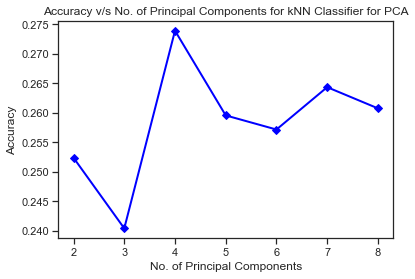

In [34]:
# Visualising the above data 

plt.plot(test_set_abalone_pca_knn['No. of components'], test_set_abalone_pca_knn['Accuracy'], 'D-', linewidth=2, color='blue')
plt.title('Accuracy v/s No. of Principal Components for kNN Classifier for PCA')
plt.xlabel('No. of Principal Components')
plt.ylabel('Accuracy')
plt.show()

In [35]:
PCA_kNN = max(test_set_abalone_pca_knn['Accuracy'])*100
PCA_kNN

27.392344497607656

We found that, for Principal components = 4 we get the highest accuracy (27.39%). So we will keep abalone-pca data with n_components = 4 for the rest of the assignment.

In [47]:
pca = PCA(n_components=4)
X_PCA = pca.fit_transform(X)
X_PCA = pd.DataFrame(X_PCA, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])
X_PCA

,PC 1,PC 2,PC 3,PC 4
0,0.062600,-0.687061,0.044731,0.001414
1,-0.060247,-0.040180,-0.081439,0.011692
2,0.229158,-0.478939,-0.012196,0.002876
3,-0.740577,-0.090284,0.057049,0.000007
4,-0.636272,0.040309,0.000666,0.010638
...,...,...,...,...
4171,0.045601,0.092119,-0.034643,-0.011363
4172,0.453205,-0.198060,-0.022573,-0.029571
4173,0.544352,-0.084471,0.019462,-0.025873
4174,0.146345,0.218776,-0.027877,-0.045383


# 1.4 For LDA

In [38]:
# For abalone-LDA data
from sklearn.neighbors import KNeighborsClassifier

test_accuracy = []
for i in range(2,9):
    lda = LinearDiscriminantAnalysis(n_components=i)
    X_lda = lda.fit_transform(X,y)
    
    column_names = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8']
    
    df = pd.DataFrame(X_lda, columns=column_names[:i])
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.20, random_state=27)
    

    
    knn = KNeighborsClassifier(leaf_size = 15, n_neighbors= 50, p= 1, weights= 'uniform')
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)

    # Compute accuracy on the testing set
    y_pred = knn.predict(X_test)
    
    test_accuracy.append([i,accuracy_score(y_test, y_pred)])
    

In [39]:
test_set_abalone_lda_knn = pd.DataFrame(test_accuracy, columns=['No. of components','Accuracy'],index=None)
test_set_abalone_lda_knn

,No. of components,Accuracy
0,2,0.264354
1,3,0.291866
2,4,0.283493
3,5,0.277512
4,6,0.282297
5,7,0.270335
6,8,0.270335


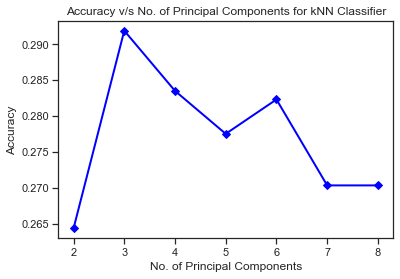

In [40]:
# Visualising the above data
plt.plot(test_set_abalone_lda_knn['No. of components'], test_set_abalone_lda_knn['Accuracy'], 'D-', linewidth=2, color='blue')
plt.title('Accuracy v/s No. of Principal Components for kNN Classifier')
plt.xlabel('No. of Principal Components')
plt.ylabel('Accuracy')
plt.show()

In [41]:
LDA_kNN = max(test_set_abalone_lda_knn['Accuracy'])*100
LDA_kNN

29.1866028708134

We found that, for no. of components = 3 we get the highest accuracy (29.18%). So we will keep abalone-lda data with n_components = 3 for the rest of the assignment.

In [48]:
lda = LinearDiscriminantAnalysis(n_components=3)
X_LDA = lda.fit_transform(X,y)
X_LDA = pd.DataFrame(X_LDA, columns=['PC 1', 'PC 2', 'PC 3'])
X_LDA

,PC 1,PC 2,PC 3
0,-1.871572,0.344321,0.447982
1,0.758634,-0.248217,-1.111993
2,-0.239803,0.101659,0.243378
3,-2.870016,0.528398,-0.214472
4,-1.662300,-0.051648,-0.887297
...,...,...,...
4171,0.855765,-0.613400,0.162836
4172,0.739809,-0.891902,0.369894
4173,1.281765,-0.383285,0.967031
4174,0.762967,-1.515514,0.704498


We observed that, LDA reduced data for abalone dataset was able to achieve higher accuracy for classification. The PCA reduced data and raw abalone data contributed almost same in the accuracy for the classifier, but there was approximately 0.1% increase in accuracy for the raw abalone data set compared to PCA reduced abalone data.

# 2. Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ theorem states the following relationship, given class variable y and dependent feature vector 
x1 through xN [https://scikit-learn.org/stable/modules/naive_bayes.html].

In [43]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# 2.1 Applying Multinomial NB on abalone-raw, abalone-pca and abalone-lda datasets.

In [44]:
# For abalone-raw

X_train,X_test,y_train,y_test = train_test_split(X_raw, y, test_size=0.2,random_state=27)

k_fold = KFold(n_splits=5, shuffle=True, random_state=27)

mnb_clf = MultinomialNB()

mnb_clf.fit(X_train, y_train)

mnb_acc_raw = accuracy_score(y_test, mnb_clf.predict(X_test))*100
print("Multinomial NB accuracy on Abalone-Raw", mnb_acc_raw)

Multinomial NB accuracy on Abalone-Raw 20.69377990430622


For Multinomial NB and Complement NB, we have to make sure that the data doesn't contain any negative values. Therefore normalising the abalone-pca and abalone-lda with MinMaxScaler before applying the Multinomial NB and Complement NB.

In [45]:
# For abalone-pca
scaler = MinMaxScaler()
scaled_data_pca = scaler.fit_transform(X_PCA)
X_train,X_test,y_train,y_test = train_test_split(scaled_data_pca, y, test_size=0.2,random_state=27)

k_fold = KFold(n_splits=5, shuffle=True, random_state=27)

mnb_clf = MultinomialNB()

mnb_clf.fit(X_train, y_train)

mnb_acc_pca = accuracy_score(y_test, mnb_clf.predict(X_test))*100
print("Multinomial NB accuracy on Abalone PCA", mnb_acc_pca)

Multinomial NB accuracy on Abalone PCA 15.19138755980861


In [49]:
# For abalone-lda
scaler = MinMaxScaler()
scaled_data_lda = scaler.fit_transform(X_LDA)
X_train,X_test,y_train,y_test = train_test_split(scaled_data_lda, y, test_size=0.2,random_state=27)

k_fold = KFold(n_splits=5, shuffle=True, random_state=27)

mnb_clf = MultinomialNB()

mnb_clf.fit(X_train, y_train)

mnb_acc_lda = accuracy_score(y_test, mnb_clf.predict(X_test))*100
print("Multinomial NB accuracy on Abalone LDA", mnb_acc_lda)

Multinomial NB accuracy on Abalone LDA 15.19138755980861


Applying Complement NB on abalone-raw, abalone-pca and abalone-lda datasets.

In [50]:
# For abalone-raw

X_train,X_test,y_train,y_test = train_test_split(X_raw, y, test_size=0.2,random_state=27)

k_fold = KFold(n_splits=5, shuffle=True, random_state=27)

cnb_clf = ComplementNB()

cnb_clf.fit(X_train, y_train)

cnb_acc_raw = accuracy_score(y_test, cnb_clf.predict(X_test))*100
print("Complement NB accuracy on Abalone-Raw", cnb_acc_raw)

Complement NB accuracy on Abalone-Raw 19.85645933014354


In [51]:
# For abalone-pca 

scaler = MinMaxScaler()
scaled_data_pca = scaler.fit_transform(X_PCA)
X_train,X_test,y_train,y_test = train_test_split(scaled_data_pca, y, test_size=0.2,random_state=27)

k_fold = KFold(n_splits=5, shuffle=True, random_state=27)

cnb_clf = ComplementNB()

cnb_clf.fit(X_train, y_train)

cnb_acc_pca = accuracy_score(y_test, cnb_clf.predict(X_test))*100
print("Complement NB accuracy on Abalone-Raw", cnb_acc_pca)

Complement NB accuracy on Abalone-Raw 18.779904306220097


In [52]:
# For abalone-lda
scaler = MinMaxScaler()
scaled_data_lda = scaler.fit_transform(X_LDA)
X_train,X_test,y_train,y_test = train_test_split(scaled_data_lda, y, test_size=0.2,random_state=27)

k_fold = KFold(n_splits=5, shuffle=True, random_state=27)

cnb_clf = ComplementNB()

cnb_clf.fit(X_train, y_train)

cnb_acc_lda = accuracy_score(y_test, cnb_clf.predict(X_test))*100
print("Complement NB accuracy on Abalone-Raw", cnb_acc_lda)

Complement NB accuracy on Abalone-Raw 18.181818181818183


In [55]:
dataset_and_classifier_names = ['RAW_MultinomialNB','PCA_MultinomialNB','LDA_MultinomialNB','RAW_ComplementNB','PCA_ComplementNB', 'LDA_ComplementNB','RAW_kNN', 'PCA_kNN','LDA_kNN']
accuracy_scores = [mnb_acc_raw, mnb_acc_pca, mnb_acc_lda,cnb_acc_raw, cnb_acc_pca,  cnb_acc_lda, RAW_kNN, PCA_kNN, LDA_kNN]
nb_accuracy_table = pd.DataFrame(accuracy_scores, index=dataset_and_classifier_names, columns=['Accuracy'])
nb_accuracy_table

,Accuracy
RAW_MultinomialNB,20.693780
PCA_MultinomialNB,15.191388
LDA_MultinomialNB,15.191388
RAW_ComplementNB,19.856459
PCA_ComplementNB,18.779904
LDA_ComplementNB,18.181818
RAW_kNN,27.511962
PCA_kNN,27.392344
LDA_kNN,29.186603


# 2.2

From, the above observed accuracies on different versions of abalone data. We can notice that Naive Bayes performs less in terms of accuracy as compared to other classification algorithms like kNN. 

- Furthermore, we found out that Complement NB is better in classification of unbalanced datasets for PCA and LDA reduced data. 

# 3. Decision Tree


Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation [https://scikit-learn.org/stable/modules/tree.html].

# 3.1 & 3.2 

- Here we first plot the mean accuracy v/s max depth and provide the best value of the parameter for max_depth for every version of abalone dataset.

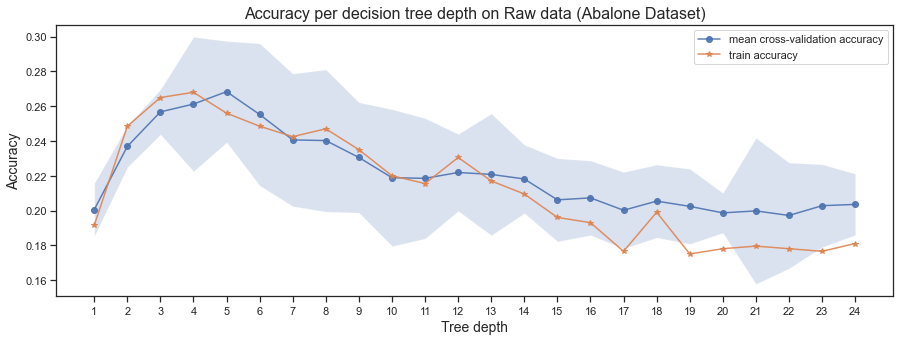

In [77]:
# For raw data
np.random.seed(27)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X_raw, y, tree_depths, cv=5, scoring='accuracy'):
    
    X_train, X_test, y_train, y_test = train_test_split(X_raw,y, test_size=0.2, random_state=27)
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
#          print(X.shape, y.shape, X_pca.shape)
        cv_scores = cross_val_score(tree_model, X_train, y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X_train, y_train).score(X_test, y_test))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on Raw data (Abalone Dataset)')

max_depth_raw = np.argmax(sm_accuracy_scores)
dt_raw_acc = max(sm_accuracy_scores)*100


Here, we found that when max depth = 4, we get the highest accuracy for the Raw Abalone Dataset which is 26.80%.

For PCA Data

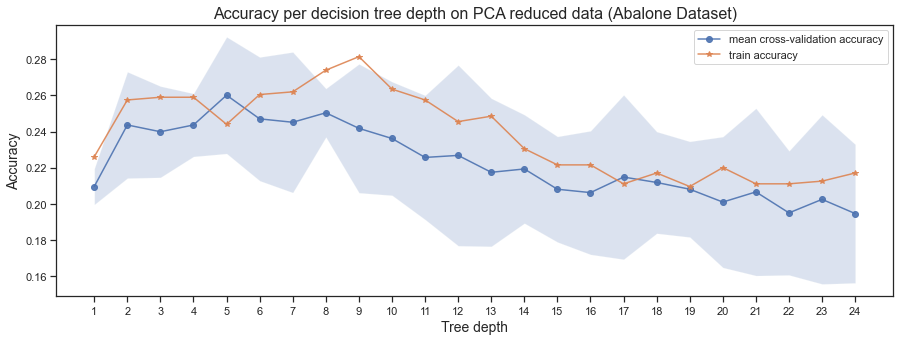

In [99]:
# For PCA data
np.random.seed(27)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X_PCA, y, tree_depths, cv=5, scoring='accuracy'):
    
    X_train, X_test, y_train, y_test = train_test_split(X_PCA,y, test_size=0.2, random_state=27)
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
#          print(X.shape, y.shape, X_pca.shape)
        cv_scores = cross_val_score(tree_model, X_train, y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X_train, y_train).score(X_test, y_test))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on PCA reduced data (Abalone Dataset)')

max_depth_pca = np.argmax(sm_accuracy_scores)
dt_pca_acc = max(sm_accuracy_scores)*100



Here, we found that when max depth = 9, we get the highest accuracy for the PCA Abalone Dataset which is 28.14%.

For LDA data

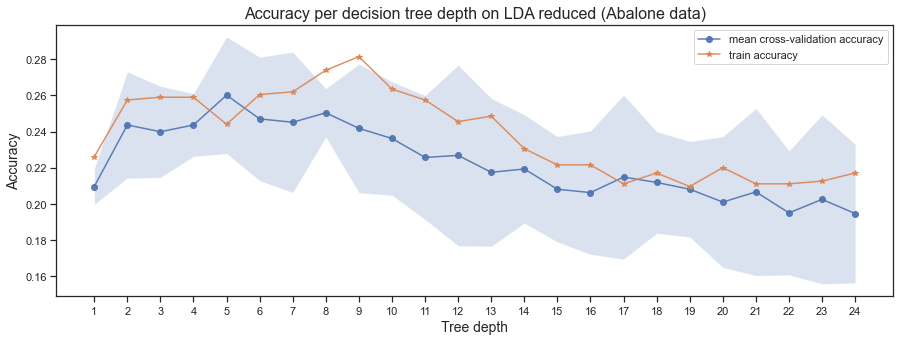

In [101]:
# For LDA data

np.random.seed(27)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X_LDA, y, tree_depths, cv=5, scoring='accuracy'):
    
    X_train, X_test, y_train, y_test = train_test_split(X_LDA,y, test_size=0.2, random_state=27)
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
#          print(X.shape, y.shape, X_pca.shape)
        cv_scores = cross_val_score(tree_model, X_train, y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X_train, y_train).score(X_test, y_test))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on LDA reduced (Abalone data)')


max_depth_lda = np.argmax(sm_accuracy_scores)
dt_lda_acc = max(sm_accuracy_scores)*100


Here, we found that when max depth = 9, we get the highest accuracy for the LDA Abalone Dataset which is 28.14%.

This is similar to that obtained from PCA data

# 3.3

In [104]:
from sklearn.tree import export_text

X_train, X_test, y_train, y_test = train_test_split(X_raw,y, test_size=0.2)

clf = DecisionTreeClassifier(max_depth=max_depth_raw+1).fit(X_train, y_train)

r = export_text(clf, feature_names=feature_columns)

print(r)

|--- Shell weight <= 0.14
|   |--- Diameter <= 0.28
|   |   |--- Viscera weight <= 0.02
|   |   |   |--- Whole weight <= 0.01
|   |   |   |   |--- class: 3
|   |   |   |--- Whole weight >  0.01
|   |   |   |   |--- class: 4
|   |   |--- Viscera weight >  0.02
|   |   |   |--- Diameter <= 0.23
|   |   |   |   |--- class: 5
|   |   |   |--- Diameter >  0.23
|   |   |   |   |--- class: 5
|   |--- Diameter >  0.28
|   |   |--- Sex <= 0.75
|   |   |   |--- Shucked weight <= 0.16
|   |   |   |   |--- class: 9
|   |   |   |--- Shucked weight >  0.16
|   |   |   |   |--- class: 8
|   |   |--- Sex >  0.75
|   |   |   |--- Shell weight <= 0.10
|   |   |   |   |--- class: 7
|   |   |   |--- Shell weight >  0.10
|   |   |   |   |--- class: 7
|--- Shell weight >  0.14
|   |--- Shell weight <= 0.25
|   |   |--- Shucked weight <= 0.26
|   |   |   |--- Sex <= 0.75
|   |   |   |   |--- class: 9
|   |   |   |--- Sex >  0.75
|   |   |   |   |--- class: 8
|   |   |--- Shucked weight >  0.26
|   |   |   |-

We notice from above result that as the value of Shell Weight increases the age (value of rings) for abalone increases, so is the case for Shucked weight. This is obvious as from the EDA (Bivariate Analysis) in previous assignment we came to know that there is a positive linear relationship between those features and the target variable.

Overall,

We noticed that for Decision Tree classifier, PCA and LDA reduced dataset were able to achieve same but higher accuracies compared to the raw Abalone data.

# 4. Random Forest Classifier

# 4.1 Best settings for classification

In [105]:
# For raw data
np.random.seed(27)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()


X_train, X_test, y_train, y_test = train_test_split(X_raw,y, test_size=0.2, random_state=27)
param_grid = [
    {'n_estimators' : [3, 5, 25, 50, 300],
    'max_depth': [2, 3, 4, 5, 10, None],}
] 

grid_search_rf_raw = GridSearchCV(rfc, param_grid, cv = 5, refit='accuracy_score', scoring='accuracy', n_jobs=-1)
grid_search_rf_raw.fit(X_train, y_train)
grid_search_rf_raw.best_params_

{'max_depth': 3, 'n_estimators': 300}

In [106]:
np.random.seed(27)

from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_raw,y, test_size=0.2)
rfc = RandomForestClassifier(max_depth=grid_search_rf_raw.best_params_['max_depth'], n_estimators = grid_search_rf_raw.best_params_['n_estimators'])
rf_clf_raw = rfc.fit(X_train, y_train)


rf_clf_raw_acc = accuracy_score(y_test, rf_clf_raw.predict(X_test))*100
rf_clf_raw_acc

29.30622009569378

Here we observed that for raw Abalone data the best parameter settings we get is {'max_depth': 3, 'n_estimators': 300} and we get the accuracy of 29.30% on the raw abalone data using the parameter settings we obtained.


# 4.2 Heat plot raw data

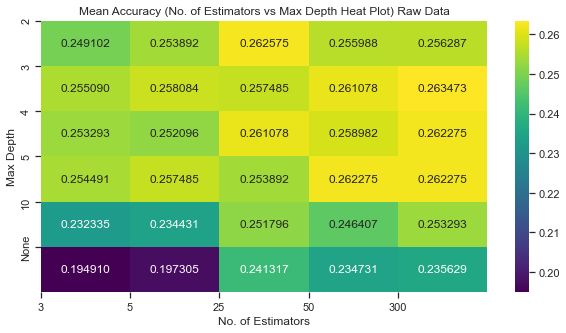

In [107]:
plt.figure(figsize=(10,5))
import seaborn as sns
grid_results_rf_raw = pd.DataFrame(grid_search_rf_raw.cv_results_)
rf_raw_scores = np.array(grid_results_rf_raw["mean_test_score"])
rf_raw_scores = rf_raw_scores.reshape(6,5)

plt.title('Mean Accuracy (No. of Estimators vs Max Depth Heat Plot) Raw Data')
ax = sns.heatmap(rf_raw_scores, annot=True, fmt='f', cmap='viridis')
plt.xticks(np.arange(5), [3, 5, 25, 50, 300])
plt.yticks(np.arange(6), [2, 3, 4, 5, 10, 'None']);
plt.xlabel('No. of Estimators')
plt.ylabel('Max Depth');

For PCA Data

In [108]:
np.random.seed(27)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()


X_train, X_test, y_train, y_test = train_test_split(X_PCA,y, test_size=0.2, random_state=27)
param_grid = [
    {'n_estimators' : [3, 5, 25, 50, 300],
    'max_depth': [2, 3, 4, 5, 10, None],}
] 

grid_search_rf_pca = GridSearchCV(rfc, param_grid, cv = 5, refit='accuracy_score', scoring='accuracy', n_jobs=-1)
grid_search_rf_pca.fit(X_train, y_train)
grid_search_rf_pca.best_params_

{'max_depth': 5, 'n_estimators': 25}

In [109]:
np.random.seed(27)

from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_PCA,y, test_size=0.2)
rfc = RandomForestClassifier(max_depth=grid_search_rf_pca.best_params_['max_depth'], n_estimators = grid_search_rf_pca.best_params_['n_estimators'])
rf_clf_pca = rfc.fit(X_train, y_train)


rf_clf_pca_acc = accuracy_score(y_test, rf_clf_pca.predict(X_test))*100
rf_clf_pca_acc


26.794258373205743

Here we observed that for PCA Abalone data the best parameter settings we get is {'max_depth': 5, 'n_estimators': 25} and we get the accuracy of 26.80% on the PCA abalone data using the parameter settings we obtained.

# Heat plot for PCA data

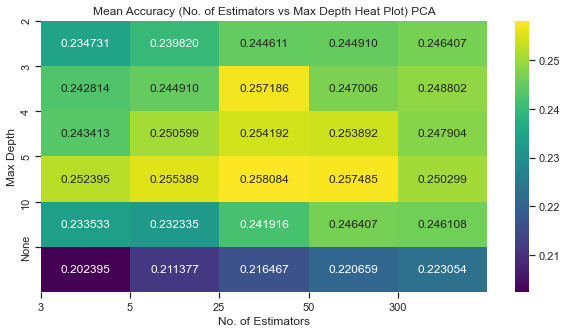

In [110]:
plt.figure(figsize=(10,5))
import seaborn as sns
grid_results_rf_pca = pd.DataFrame(grid_search_rf_pca.cv_results_)
rf_pca_scores = np.array(grid_results_rf_pca["mean_test_score"])
rf_pca_scores = rf_pca_scores.reshape(6,5)

plt.title('Mean Accuracy (No. of Estimators vs Max Depth Heat Plot) PCA')
ax = sns.heatmap(rf_pca_scores, annot=True, fmt='f', cmap='viridis')
plt.xticks(np.arange(5), [3, 5, 25, 50, 300])
plt.yticks(np.arange(6), [2, 3, 4, 5, 10, 'None']);
plt.xlabel('No. of Estimators')
plt.ylabel('Max Depth');

For LDA data

In [111]:
np.random.seed(27)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()


X_train, X_test, y_train, y_test = train_test_split(X_LDA,y, test_size=0.2, random_state=27)
param_grid = [
    {'n_estimators' : [3, 5, 25, 100, 300],
    'max_depth': [2, 3, 5, 10, None],}
] # a list of dictionaries

grid_search_rf_lda = GridSearchCV(rfc, param_grid, cv = 5, refit='accuracy_score', scoring='accuracy', n_jobs=-1)
grid_search_rf_lda.fit(X_train, y_train)
grid_search_rf_lda.best_params_

{'max_depth': 3, 'n_estimators': 300}

In [112]:
np.random.seed(27)

from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_LDA,y, test_size=0.2)
rfc = RandomForestClassifier(max_depth=grid_search_rf_lda.best_params_['max_depth'], n_estimators = grid_search_rf_lda.best_params_['n_estimators'])
rf_clf_lda = rfc.fit(X_train, y_train)

rf_clf_lda_acc = accuracy_score(y_test, rf_clf_lda.predict(X_test))*100
rf_clf_lda_acc



28.588516746411486

Here we observed that for LDA Abalone data the best parameter settings we get is {'max_depth': 3, 'n_estimators': 300} and we get the accuracy of 28.58% on the LDA abalone data using the parameter settings we obtained.

# Heat plot for LDA data

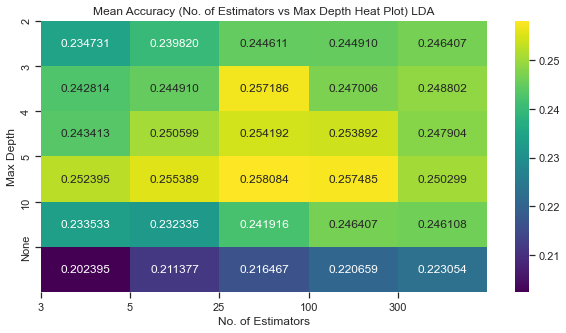

In [113]:
plt.figure(figsize=(10,5))
import seaborn as sns
grid_results_rf_lda = pd.DataFrame(grid_search_rf_lda.cv_results_)
rf_lda_scores = np.array(grid_results_rf_lda["mean_test_score"])
rf_lda_scores = rf_pca_scores.reshape(6,5)

plt.title('Mean Accuracy (No. of Estimators vs Max Depth Heat Plot) LDA')
ax = sns.heatmap(rf_lda_scores, annot=True, fmt='f', cmap='viridis')
plt.xticks(np.arange(5), [3, 5, 25, 100, 300])
plt.yticks(np.arange(6), [2, 3, 4, 5, 10, 'None']);
plt.xlabel('No. of Estimators')
plt.ylabel('Max Depth');

Overall, we can notice that for raw data the accuracy of Random Forest Classifier is slightly higher than the PCA and LDA reduced datasets.

# 5. Gradient Tree Boosting

### 5.1 & 5.2

Here we first plot the Mean Accuracy vs No.of estimators Plot and then note the Best settings for classification of the different versions of abalone data.

### Raw Data

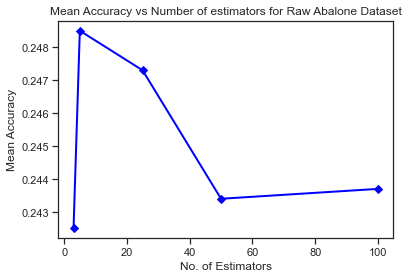

In [115]:
# For raw data
np.random.seed(27)

from sklearn.ensemble import GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(X_raw,y, test_size=0.2)

gbc_raw = GradientBoostingClassifier(max_features = 'auto', random_state = 27)
param_grid = {
    'n_estimators' : [3, 5, 25, 50, 100],
}

grid_search_gbc_raw = GridSearchCV(estimator=gbc_raw, param_grid=param_grid, cv = 5, refit='accuracy_score')
grid_search_gbc_raw.fit(X_train,y_train)
grid_results_gbc_raw = pd.DataFrame(grid_search_gbc_raw.cv_results_)
plt.plot([3, 5, 25, 50, 100], grid_results_gbc_raw['mean_test_score'], 'D-', linewidth=2, color='blue')
plt.title('Mean Accuracy vs Number of estimators for Raw Abalone Dataset')
plt.xlabel('No. of Estimators')
plt.ylabel('Mean Accuracy')
plt.show();
gbc_raw_acc = accuracy_score(y_test, grid_search_gbc_raw.predict(X_test))*100

Here we observed that for raw data the GradientBoosting Classifier with n_estimators = 5 is the best parameter setting with mean-accuracy of 24.85% and test set accuracy of 26.31%.

### PCA Data

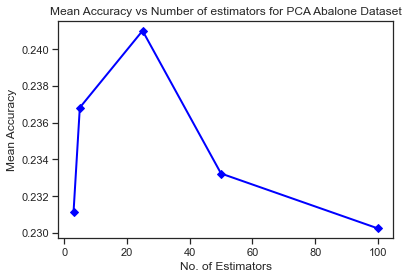

In [120]:
np.random.seed(27)

from sklearn.ensemble import GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(X_PCA,y, test_size=0.2)

gbc_pca = GradientBoostingClassifier(max_features = 'auto', random_state = 27)
param_grid = {
    'n_estimators' : [3, 5, 25, 50, 100],
}

grid_search_gbc_pca = GridSearchCV(estimator=gbc_pca, param_grid=param_grid, cv = 5, refit='accuracy_score')
grid_search_gbc_pca.fit(X_train,y_train)
grid_results_gbc_pca = pd.DataFrame(grid_search_gbc_pca.cv_results_)
plt.plot([3, 5, 25, 50, 100], grid_results_gbc_pca['mean_test_score'], 'D-', linewidth=2, color='blue')
plt.title('Mean Accuracy vs Number of estimators for PCA Abalone Dataset')
plt.xlabel('No. of Estimators')
plt.ylabel('Mean Accuracy')
plt.show()

In [121]:
gbc_pca_acc = accuracy_score(y_test, grid_search_gbc_pca.predict(X_test))*100
gbc_pca_acc, grid_search_gbc_pca.best_score_, grid_search_gbc_pca.best_params_

(27.751196172248804, 0.2410179640718563, {'n_estimators': 25})

Here we observed that for PCA data the GradientBoosting Classifier with n_estimators = 25 is the best parameter setting with mean-accuracy of 24.10% and test set accuracy of 27.75%.

### LDA data

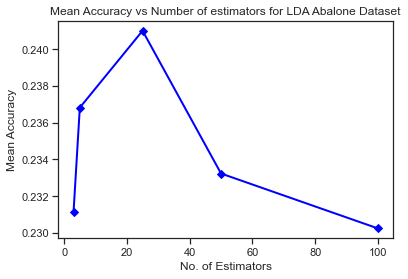

In [122]:
np.random.seed(27)

from sklearn.ensemble import GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(X_LDA,y, test_size=0.2)

gbc_lda = GradientBoostingClassifier(max_features = 'auto', random_state = 27)
param_grid = {
    'n_estimators' : [3, 5, 25, 50, 100],
}

grid_search_gbc_lda = GridSearchCV(estimator=gbc_lda, param_grid=param_grid, cv = 5, refit='accuracy_score')
grid_search_gbc_lda.fit(X_train,y_train)
grid_results_gbc_lda = pd.DataFrame(grid_search_gbc_lda.cv_results_)
plt.plot([3, 5, 25, 50, 100], grid_results_gbc_pca['mean_test_score'], 'D-', linewidth=2, color='blue')
plt.title('Mean Accuracy vs Number of estimators for LDA Abalone Dataset')
plt.xlabel('No. of Estimators')
plt.ylabel('Mean Accuracy')
plt.show()

In [123]:
gbc_lda_acc = accuracy_score(y_test, grid_search_gbc_lda.predict(X_test))*100
gbc_lda_acc, grid_search_gbc_lda.best_score_, grid_search_gbc_lda.best_params_

(26.555023923444978, 0.25898203592814373, {'n_estimators': 25})

Here we observed that for LDA data the GradientBoosting Classifier with n_estimators = 25 is the best parameter setting with mean-accuracy of 25.89% and test set accuracy of 26.55%.



Overall, we can notice that for PCA reduced data the accuracy of Gradient Boosted Classifier is slightly higher than the raw and LDA reduced datasets.

# 6. Final Results

In [146]:
final_table_index = ['kNN', 'Multinomial NB', 'Complement NB', 'Decision Tree', 'Random Forest', 'Gradient Boosted Tree']

column = ['abalone-raw', 'abalone-raw-params', 'abalone-pca', 'abalone-pca-params', 'abalone-lda', 'abalone-lda-params']

final_table = pd.DataFrame(columns=column, index=final_table_index)


final_table.loc['kNN'] = [RAW_kNN, "{'leaf_size': 15, 'n_neighbors': 50}", PCA_kNN, "{'leaf_size': 15, 'n_neighbors': 50}", LDA_kNN, "{'leaf_size': 15, 'n_neighbors': 50}"]
final_table.loc['Multinomial NB'] = [mnb_acc_raw,"{'alpha': 1.0, fit_prior': True}", mnb_acc_pca,"{'alpha': 1.0,  'fit_prior': True}", mnb_acc_lda, "{'alpha': 1.0, 'fit_prior': True}"]
final_table.loc['Complement NB'] = [cnb_acc_raw, "{'alpha': 1.0, 'norm': False}", cnb_acc_pca, "{'alpha': 1.0, 'norm': False}", cnb_acc_lda, "{'alpha': 1.0, 'norm': False}"]
final_table.loc['Decision Tree'] = [dt_raw_acc, "{'max_depth'}: 4", dt_pca_acc,"{'max_depth'}: 9", dt_lda_acc, "{'max_depth'}: 9"]
final_table.loc['Random Forest'] = [rf_clf_raw_acc, grid_search_rf_raw.best_params_, rf_clf_pca_acc, grid_search_rf_pca.best_params_,rf_clf_lda_acc, grid_search_rf_lda.best_params_ ]
final_table.loc['Gradient Boosted Tree'] = [gbc_raw_acc, grid_search_gbc_raw.best_params_, gbc_pca_acc, grid_search_gbc_pca.best_params_, gbc_lda_acc, grid_search_gbc_lda.best_params_]

final_table



,abalone-raw,abalone-raw-params,abalone-pca,abalone-pca-params,abalone-lda,abalone-lda-params
kNN,27.511962,"{'leaf_size': 15, 'n_neighbors': 50}",27.392344,"{'leaf_size': 15, 'n_neighbors': 50}",29.186603,"{'leaf_size': 15, 'n_neighbors': 50}"
Multinomial NB,20.69378,"{'alpha': 1.0, fit_prior': True}",15.191388,"{'alpha': 1.0, 'fit_prior': True}",15.191388,"{'alpha': 1.0, 'fit_prior': True}"
Complement NB,19.856459,"{'alpha': 1.0, 'norm': False}",18.779904,"{'alpha': 1.0, 'norm': False}",18.181818,"{'alpha': 1.0, 'norm': False}"
Decision Tree,26.796407,{'max_depth'}: 4,28.143713,{'max_depth'}: 9,28.143713,{'max_depth'}: 9
Random Forest,29.30622,"{'max_depth': 3, 'n_estimators': 300}",26.794258,"{'max_depth': 5, 'n_estimators': 25}",28.588517,"{'max_depth': 3, 'n_estimators': 300}"
Gradient Boosted Tree,26.315789,{'n_estimators': 5},27.751196,{'n_estimators': 25},26.555024,{'n_estimators': 25}


We observed the following from the above table,

- For wine-raw dataset Random Forest Classifier resulted in best accuracy.

- For PCA reduced wine dataset Decision Tree resulted in better classification accuracy.

- For LDA reduced wine dataset kNN resulted in better classification accuracy.

It can be noted that, for kNN and Decision Tree Classifier Algorithms the PCA and LDA reduced data ie. data with reduced dimensions increased the classification accuracy. Whereas, for other algorithms the classification accuracy remained almost same for all the different versions of the data (Complement NB Classifier and Gradient Boosted Tree) or decreased for the PCA-LDA reduced datasets for remaining algorithms.

# Wine data

In [147]:
#Importing the data first for red and white wine and combining into a single dataframe
red_wine_dataset = pd.read_csv("winequality-red.csv", sep=";")

white_wine_dataset = pd.read_csv("winequality-white.csv", sep=";")

red_wine_dataset['color'] = np.ones(shape = red_wine_dataset.shape[0],dtype=int)

white_wine_dataset['color'] = np.zeros(shape= white_wine_dataset.shape[0], dtype=int)

wine_dataset = pd.concat([red_wine_dataset, white_wine_dataset])

feature_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol','color']
target_column = ['quality']


In [148]:
wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


Applying MinMax Normalisation on the Wine Dataset

In [149]:
#Applying Normalisation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(wine_dataset.drop(columns=['quality'], axis=1))

In [150]:
minmax_wine_data = pd.DataFrame(scaled_data, columns=feature_columns) 
# minmax_wine_data['quality'] = wine_dataset['quality']
minmax_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,1.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,1.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,1.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,1.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.0
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.0
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.0
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.0


In [151]:
quality = pd.Series(wine_dataset['quality'], index=None)

In [152]:
quality.index = [i for i in range(0,6497)]

In [153]:
minmax_wine_data['quality'] = wine_dataset['quality']

In [154]:
minmax_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,1.0,5
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,1.0,5
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,1.0,5
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,1.0,6
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.0,6
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.0,5
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.0,6
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.0,7


# 1 Representation Learning 

# 1.1 Applying PCA on the wine dataset, for 2 Principal Components.

In [155]:
from sklearn.model_selection import train_test_split
X=minmax_wine_data.drop("quality", axis = 1)
y=minmax_wine_data["quality"]
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [156]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X)

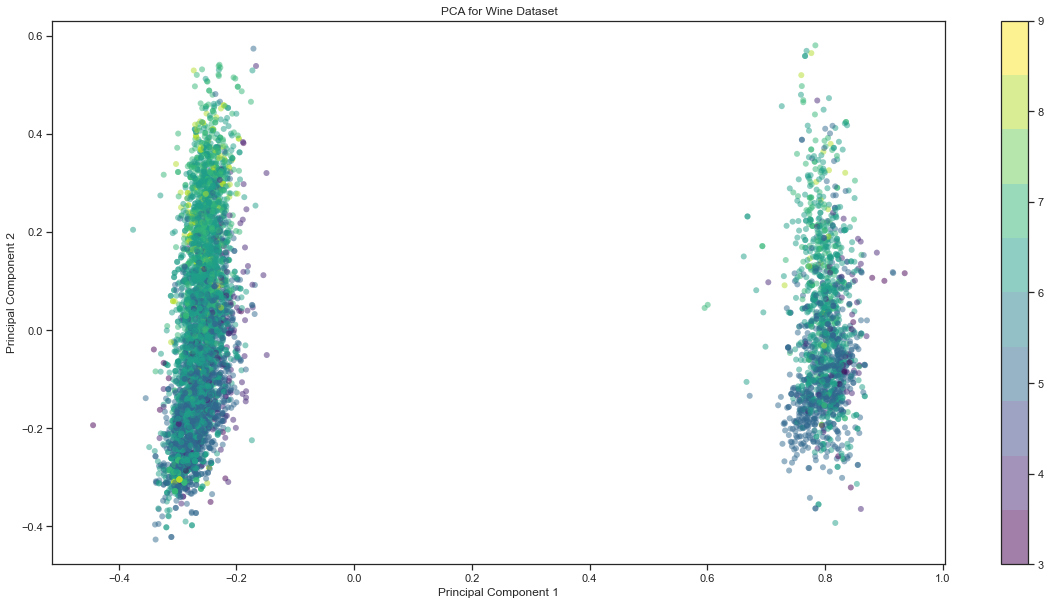

In [162]:
plt.figure(figsize=(20,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.title('PCA for Wine Dataset');

From, the above obtained plot of PCA we can observe that, there is much variance across Principal Component 2 than Principal Component 1. We can notice that for higher values of Principal Component 2 the quality of wine increases. Whereas for lower values of Principal Component 2 there is greater concentration of low quality wine.

# 1.1 Applying LDA on the wine dataset, for 2 Principal Components.

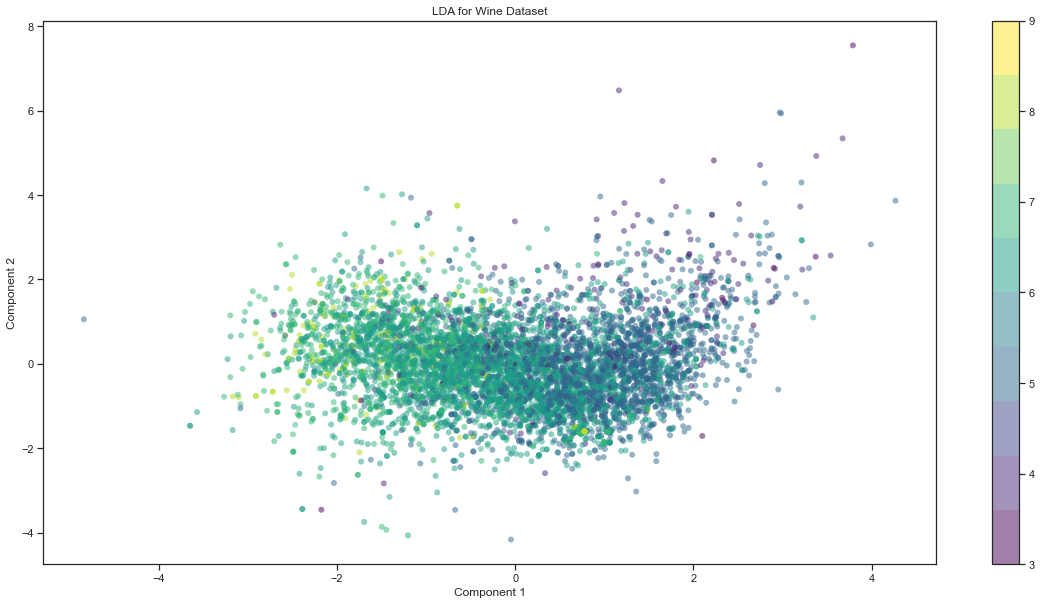

In [164]:
lda=LinearDiscriminantAnalysis(n_components=2)
X_lda=lda.fit_transform(X,y)
plt.figure(figsize=(20,10))
plt.scatter(X_lda[:, 0], X_lda[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.title('LDA for Wine Dataset');


Here, we can observe that for greater values of Component 1, the quality of wines increases. Whereas it decreases for lower quality of wine. Both low and high quality wines split about value 0 of Component 1.

# 1.1 Applying t-SNE on the abalone dataset, for 2 Principal Components.

In [165]:
import time
from sklearn.manifold import TSNE

In [168]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, n_iter=300, perplexity=40)
X_tsne = tsne.fit_transform(minmax_wine_data.drop(['color', 'quality'], axis=1))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.005s...
[t-SNE] Computed neighbors for 6497 samples in 0.690s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.073528
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.088242
[t-SNE] KL divergence after 300 iterations: 2.301509


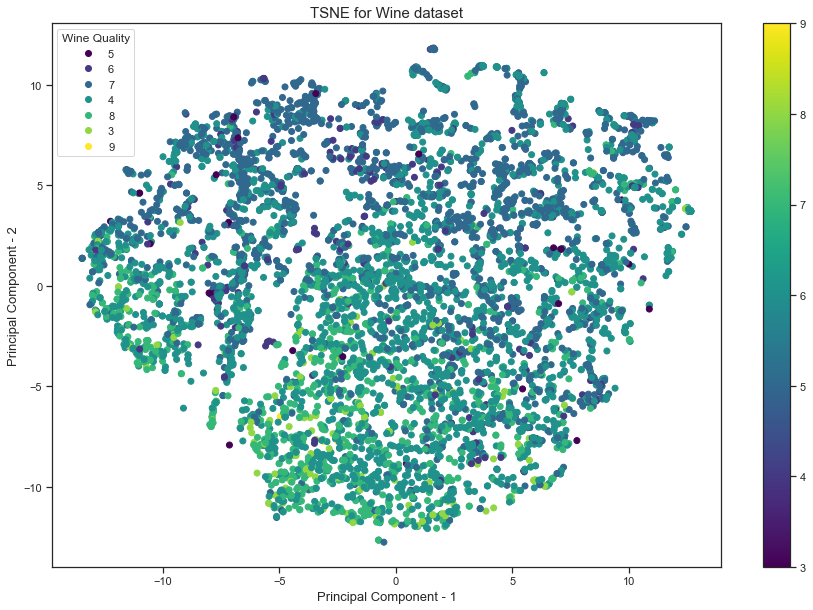

In [169]:
plt.figure(figsize=(15,10))
target = [ 5, 6, 7, 4, 8, 3, 9]
temp = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis')
plt.xlabel('Principal Component - 1',fontsize=13)
plt.ylabel('Principal Component - 2',fontsize=13)
plt.title("TSNE for Wine dataset",fontsize=15)
plt.legend(handles=temp.legend_elements()[0], title="Wine Quality", labels=target);
plt.colorbar();

After performing t-SNE we found that if we strech a diagonal from the bottom right to the top left corner, we notice that on the bottom-left triangle the wines with quality >=6 reside. Whereas, on the upper-right triangle there is presense of low quality wines.

# 1.3 Accuracy vs Dimensions

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

test_accuracy = []
for i in range(2,9):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    
    column_names = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8']
    
    df = pd.DataFrame(X_pca, columns=column_names[:i])
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42)
    

    
    knn = KNeighborsClassifier(n_neighbors=23)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)

    # Compute accuracy on the testing set
    y_pred = knn.predict(X_test)
    
    test_accuracy.append([i,accuracy_score(y_test, y_pred)])
    
    
    
    

In [171]:
test_set = pd.DataFrame(test_accuracy, columns=['No. of components','Accuracy'],index=None)
test_set


,No. of components,Accuracy
0,2,0.521538
1,3,0.516154
2,4,0.516923
3,5,0.529231
4,6,0.535385
5,7,0.532308
6,8,0.541538


# 1.2 Produce a scree-plot to look at the cumulative variance represented by the PCA eigenvectors.

In [172]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=12)

In [173]:
X_pca = pca1.fit_transform(X)
cumsum = np.cumsum(pca1.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [174]:
pca1.explained_variance_ratio_

array([6.92196299e-01, 1.18141916e-01, 6.27407159e-02, 3.12992501e-02,
       2.65144845e-02, 1.69817765e-02, 1.60791797e-02, 1.28780515e-02,
       1.18630738e-02, 6.19326429e-03, 4.73431637e-03, 3.77672377e-04])

In [175]:
variance = pca1.explained_variance_ratio_
cumsum

array([0.6921963 , 0.81033821, 0.87307893, 0.90437818, 0.93089267,
       0.94787444, 0.96395362, 0.97683167, 0.98869475, 0.99488801,
       0.99962233, 1.        ])

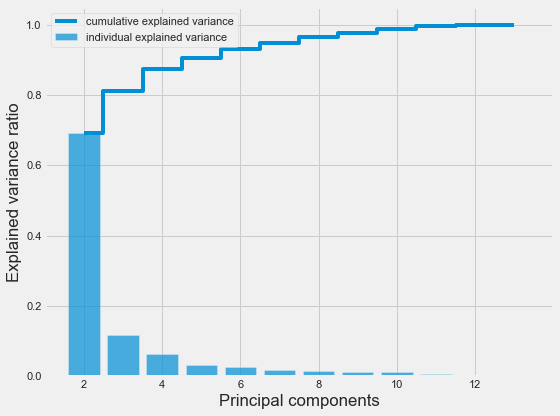

In [247]:
#Plot variance explained by the principal components
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8, 6))
    plt.bar(range(2,14), variance, alpha=0.7, align='center',
            label='individual explained variance')
    plt.step(range(2,14),cumsum, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout();

Here, we can observe that first 4 Principal components are able to explain approximately 90% of the variance in the data. Whereas other principal components doesn't add much to explain the variance of the data.



Scree-plot that shows variance explained by each individual principal component.

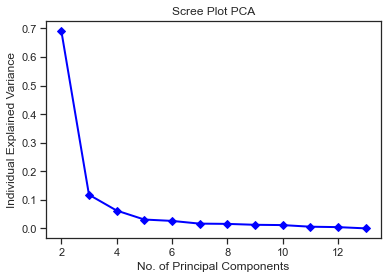

In [248]:
# Scree plot
plt.plot(range(2,14), variance, 'D-', linewidth=2, color='blue')
plt.title('Scree Plot PCA')
plt.xlabel('No. of Principal Components')
plt.ylabel('Individual Explained Variance')
plt.show()

# 1.3 Accuracy vs Dimensions

Let's find the best reduced dimensionality for the dataset with respect to how it impacts the accuracy of a kNN classifier. the best one found from asg1, one of the weighted versions using a normalized wine dataset has following parameters. 

The best parameters found from previous assignment are : 
##### {'leaf_size': 15, 'n_neighbors': 40, 'p': 1, 'weights': 'distance'}

For wine-raw we will use the MinMax scaled abalone data.

In [182]:
X_raw = minmax_wine_data.drop(['quality'], axis=1)
X_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,1.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,1.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,1.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,1.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.0
6493,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.0
6494,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.0
6495,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.0


In [183]:
# For Raw wine data
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.20, random_state=27)


knn = KNeighborsClassifier(leaf_size = 15, n_neighbors= 50, p= 1, weights= 'uniform')

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Compute accuracy on the testing set
y_pred = knn.predict(X_test)

RAW_kNN = accuracy_score(y_test, y_pred)*100

RAW_kNN

52.61538461538462

After performing kNN on MinMax scaled raw wine data, we get (52.61%) accuracy. Let's compare it with the PCA and LDA reduced data accuracy on the same setting of hyperparameters for KNeighborsClassifier.

In [186]:
# For PCA Wine Data
from sklearn.neighbors import KNeighborsClassifier

test_accuracy = []
for i in range(2,13):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    
    column_names = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6', 'Principal Component 7', 'Principal Component 8', 'Principal Component 9', 'Principal Component 10', 'Principal Component 11','Principal Component 12']
    
    df = pd.DataFrame(X_pca, columns=column_names[:i])
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42)
    

    
    knn = KNeighborsClassifier(leaf_size = 15, n_neighbors= 50, p= 1, weights= 'uniform')
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)

    # Compute accuracy on the testing set
    y_pred = knn.predict(X_test)
    
    test_accuracy.append([i,accuracy_score(y_test, y_pred)])
    
    
    
    

Plotting the accuracy obtained for kNN classifier on different number of components.

In [187]:
test_set_wine_pca_knn = pd.DataFrame(test_accuracy, columns=['No. of components','Accuracy'],index=None)
test_set_wine_pca_knn


,No. of components,Accuracy
0,2,0.506154
1,3,0.516923
2,4,0.522308
3,5,0.536923
4,6,0.536154
5,7,0.535385
6,8,0.550769
7,9,0.546923
8,10,0.545385
9,11,0.546154


Visualising the above data

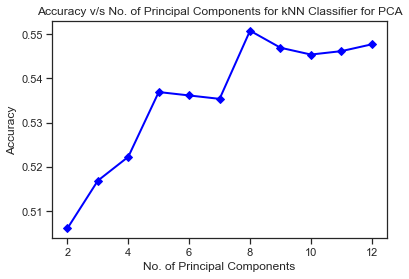

In [189]:
plt.plot(test_set_wine_pca_knn['No. of components'], test_set_wine_pca_knn['Accuracy'], 'D-', linewidth=2, color='blue')
plt.title('Accuracy v/s No. of Principal Components for kNN Classifier for PCA')
plt.xlabel('No. of Principal Components')
plt.ylabel('Accuracy')
plt.show()

In [190]:
PCA_kNN = max(test_set_wine_pca_knn['Accuracy'])*100
PCA_kNN

55.07692307692308

We found that, for Principal components = 8 we get the highest accuracy (55.07%). So we will keep wine-pca data with n_components = 8 for the rest of the assignment.

In [192]:
pca = PCA(n_components=8)
X_PCA = pca.fit_transform(X)
X_PCA = pd.DataFrame(X_PCA, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7','PC 8'])
X_PCA

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8
0,0.832525,-0.087275,-0.257845,-0.114447,-0.023814,0.067362,0.002822,0.000321
1,0.820548,-0.107196,-0.088351,-0.200511,0.173314,0.005628,0.105758,-0.016324
2,0.817965,-0.088031,-0.093772,-0.158876,0.089070,0.004930,0.065894,-0.007295
3,0.772052,-0.152950,0.279738,0.118270,-0.089474,0.044730,-0.100799,-0.066433
4,0.832525,-0.087275,-0.257845,-0.114447,-0.023814,0.067362,0.002822,0.000321
...,...,...,...,...,...,...,...,...
6492,-0.241668,0.167495,-0.043445,-0.015710,-0.103763,-0.022754,0.016467,-0.012115
6493,-0.282467,-0.150941,-0.027870,-0.001633,0.046654,-0.021326,-0.015544,-0.029681
6494,-0.262531,-0.118086,0.035359,-0.170063,-0.090977,-0.102010,0.038511,-0.061192
6495,-0.253894,0.394334,-0.080216,-0.005551,0.004608,-0.000991,-0.044456,-0.033286


# For LDA

In [193]:
from sklearn.neighbors import KNeighborsClassifier

test_accuracy = []
for i in range(2,7):
    lda = LinearDiscriminantAnalysis(n_components=i)
    X_lda = lda.fit_transform(X,y)
    
    column_names = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4', 'Principal Component 5', 'Principal Component 6'] 
    
    df = pd.DataFrame(X_lda, columns=column_names[:i])
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.20, random_state=42)
    

    
    knn = KNeighborsClassifier(leaf_size = 15, n_neighbors= 50, p= 1, weights= 'uniform')
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)

    # Compute accuracy on the testing set
    y_pred = knn.predict(X_test)
    
    test_accuracy.append([i,accuracy_score(y_test, y_pred)])
    
    
    
    

In [194]:
test_set_wine_lda_knn = pd.DataFrame(test_accuracy, columns=['No. of components','Accuracy'],index=None)
test_set_wine_lda_knn

,No. of components,Accuracy
0,2,0.542308
1,3,0.545385
2,4,0.559231
3,5,0.543846
4,6,0.547692


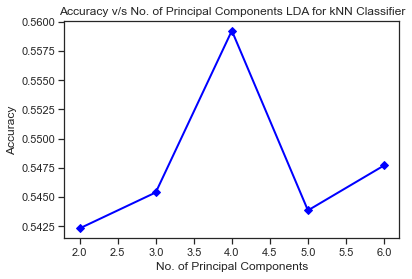

In [195]:
plt.plot(test_set_wine_lda_knn['No. of components'], test_set_wine_lda_knn['Accuracy'], 'D-', linewidth=2, color='blue')
plt.title('Accuracy v/s No. of Principal Components LDA for kNN Classifier')
plt.xlabel('No. of Principal Components')
plt.ylabel('Accuracy')
plt.show()

In [196]:
LDA_kNN = max(test_set_wine_lda_knn['Accuracy'])*100
LDA_kNN

55.92307692307692

We found that, for no. of components = 4 we get the highest accuracy (55.92%). So we will keep wine-lda data with n_components = 4 for the rest of the assignment.

In [197]:
lda = LinearDiscriminantAnalysis(n_components=4)
X_LDA = lda.fit_transform(X,y)
X_LDA = pd.DataFrame(X_LDA, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])
X_LDA

,PC 1,PC 2,PC 3,PC 4
0,2.068161,0.907126,0.256553,-0.511175
1,2.231762,1.487823,-1.115445,0.453801
2,1.947723,0.928774,-0.246145,0.361122
3,0.151859,-1.303867,-0.699511,0.619895
4,2.068161,0.907126,0.256553,-0.511175
...,...,...,...,...
6492,-0.864800,0.235627,1.017403,-0.206414
6493,0.552261,-0.331848,-1.142264,-0.081371
6494,1.087462,-0.453927,1.539586,-0.240565
6495,-1.652942,0.837409,0.354420,0.912104


We observed that, both LDA and PCA reduced data for wine dataset were able to achieve higher accuracy and almost same (55%) for classification . The raw wine data contributed almost lesser in improving the accuracy for the classifier, with approximately 3% decrease in accuracy for the raw wine data set compared to LDA-PCA reduced wine data.

# 2. Naive Bayes

# 2.1 Comparisions of Naive Bayes

In [198]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# 2.1 Applying Multinomial NB on abalone-raw, abalone-pca and abalone-lda datasets.

In [199]:
# For wine-raw

X_train,X_test,y_train,y_test = train_test_split(X_raw, y, test_size=0.2,random_state=27)

k_fold = KFold(n_splits=5, shuffle=True, random_state=27)

mnb_clf = MultinomialNB()

mnb_clf.fit(X_train, y_train)

mnb_acc_raw = accuracy_score(y_test, mnb_clf.predict(X_test))*100
print("Multinomial NB accuracy on Wine-Raw", mnb_acc_raw)

Multinomial NB accuracy on Wine-Raw 46.07692307692307


For Multinomial NB and Complement NB, we have to make sure that the data doesn't contain any negative values. Therefore normalising the wine-pca and wine-lda with MinMaxScaler before applying the Multinomial NB and Complement NB.

In [200]:
# For wine-pca
scaler = MinMaxScaler()
scaled_data_pca = scaler.fit_transform(X_PCA)
X_train,X_test,y_train,y_test = train_test_split(scaled_data_pca, y, test_size=0.2,random_state=27)

k_fold = KFold(n_splits=5, shuffle=True, random_state=27)

mnb_clf = MultinomialNB()

mnb_clf.fit(X_train, y_train)

mnb_acc_pca = accuracy_score(y_test, mnb_clf.predict(X_test))*100
print("Multinomial NB accuracy on Wine PCA", mnb_acc_pca)

Multinomial NB accuracy on Wine PCA 43.230769230769226


In [201]:
# For wine-lda
scaler = MinMaxScaler()
scaled_data_lda = scaler.fit_transform(X_LDA)
X_train,X_test,y_train,y_test = train_test_split(scaled_data_lda, y, test_size=0.2,random_state=27)

k_fold = KFold(n_splits=5, shuffle=True, random_state=27)

mnb_clf = MultinomialNB()

mnb_clf.fit(X_train, y_train)

mnb_acc_lda = accuracy_score(y_test, mnb_clf.predict(X_test))*100
print("Multinomial NB accuracy on Wine LDA", mnb_acc_lda)

Multinomial NB accuracy on Wine LDA 43.230769230769226


Applying Complement NB on wine-raw, wine-pca and wine-lda datasets.

In [202]:
# For wine-raw

X_train,X_test,y_train,y_test = train_test_split(X_raw, y, test_size=0.2,random_state=27)

k_fold = KFold(n_splits=5, shuffle=True, random_state=27)

cnb_clf = ComplementNB()

cnb_clf.fit(X_train, y_train)

cnb_acc_raw = accuracy_score(y_test, cnb_clf.predict(X_test))*100
print("Complement NB accuracy on Wine-Raw", cnb_acc_raw)

Complement NB accuracy on Wine-Raw 42.69230769230769


In [203]:
# For wine-pca 

scaler = MinMaxScaler()
scaled_data_pca = scaler.fit_transform(X_PCA)
X_train,X_test,y_train,y_test = train_test_split(scaled_data_pca, y, test_size=0.2,random_state=27)

k_fold = KFold(n_splits=5, shuffle=True, random_state=27)

cnb_clf = ComplementNB()

cnb_clf.fit(X_train, y_train)

cnb_acc_pca = accuracy_score(y_test, cnb_clf.predict(X_test))*100
print("Complement NB accuracy on Wine-PCA", cnb_acc_pca)

Complement NB accuracy on Wine-PCA 45.76923076923077


In [204]:
# For wine-lda
scaler = MinMaxScaler()
scaled_data_lda = scaler.fit_transform(X_LDA)
X_train,X_test,y_train,y_test = train_test_split(scaled_data_lda, y, test_size=0.2,random_state=27)

k_fold = KFold(n_splits=5, shuffle=True, random_state=27)

cnb_clf = ComplementNB()

cnb_clf.fit(X_train, y_train)

cnb_acc_lda = accuracy_score(y_test, cnb_clf.predict(X_test))*100
print("Complement NB accuracy on Wine-LDA", cnb_acc_lda)

Complement NB accuracy on Wine-LDA 41.23076923076923


In [205]:
dataset_and_classifier_names = ['RAW_MultinomialNB','PCA_MultinomialNB','LDA_MultinomialNB','RAW_ComplementNB','PCA_ComplementNB', 'LDA_ComplementNB','RAW_kNN', 'PCA_kNN','LDA_kNN']
accuracy_scores = [mnb_acc_raw, mnb_acc_pca, mnb_acc_lda,cnb_acc_raw, cnb_acc_pca,  cnb_acc_lda, RAW_kNN, PCA_kNN, LDA_kNN]
nb_accuracy_table = pd.DataFrame(accuracy_scores, index=dataset_and_classifier_names, columns=['Accuracy'])
nb_accuracy_table

,Accuracy
RAW_MultinomialNB,46.076923
PCA_MultinomialNB,43.230769
LDA_MultinomialNB,43.230769
RAW_ComplementNB,42.692308
PCA_ComplementNB,45.769231
LDA_ComplementNB,41.230769
RAW_kNN,52.615385
PCA_kNN,55.076923
LDA_kNN,55.923077


# 2.2

From, the above observed accuracies on different versions of wine data. We can notice that Naive Bayes performs less in terms of accuracy as compared to other classification algorithms like kNN. 

- Furthermore, we found out that Multiomial NB is better in classification of unbalanced datasets for raw and LDA reduced wine-data. Whereas for PCA reduced Wine data, Complement NB did a better job in terms of accuracy. Although the difference between the accuracy scores were not high or significant.

# 3. Decision Tree

# 3.1 & 3.2

Here we first plot the mean accuracy v/s max depth and provide the best value of the parameter for max_depth for every version of wine dataset

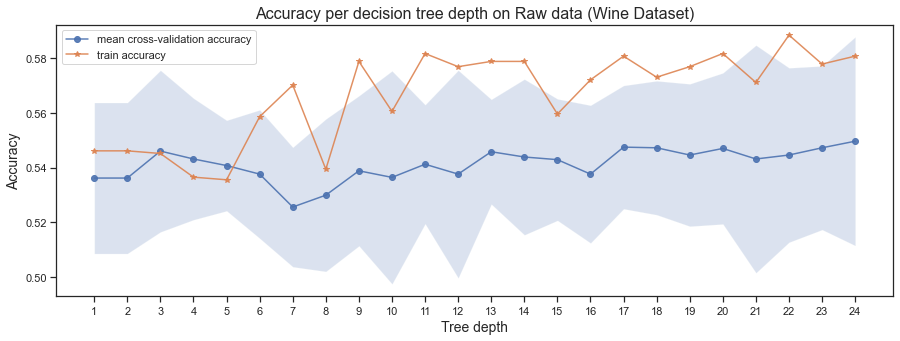

In [206]:
# For raw data
np.random.seed(27)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X_raw, y, tree_depths, cv=5, scoring='accuracy'):
    
    X_train, X_test, y_train, y_test = train_test_split(X_raw,y, test_size=0.2, random_state=27)
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
#          print(X.shape, y.shape, X_pca.shape)
        cv_scores = cross_val_score(tree_model, X_train, y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X_train, y_train).score(X_test, y_test))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on Raw data (Wine Dataset)')

max_depth_raw = np.argmax(sm_accuracy_scores)
dt_raw_acc = max(sm_accuracy_scores)*100


Here, we found that when max depth = 22, we get the highest accuracy for the Raw Wine Dataset which is 58.84%.

# Accuracy vs tree depth PCA data

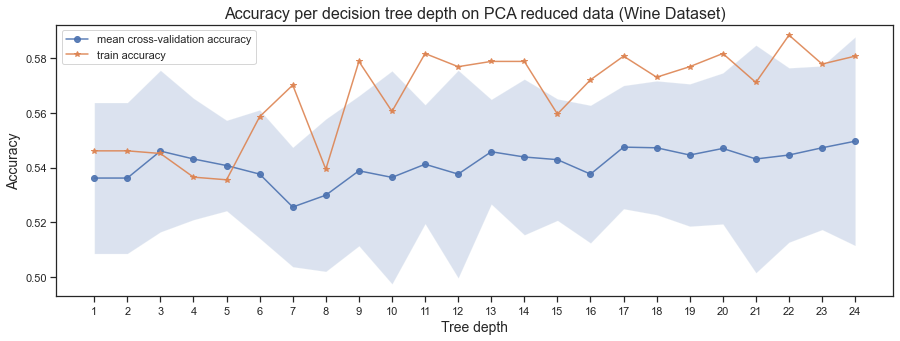

In [208]:
# For PCA data
np.random.seed(27)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X_PCA, y, tree_depths, cv=5, scoring='accuracy'):
    
    X_train, X_test, y_train, y_test = train_test_split(X_PCA,y, test_size=0.2, random_state=27)
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
#          print(X.shape, y.shape, X_pca.shape)
        cv_scores = cross_val_score(tree_model, X_train, y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X_train, y_train).score(X_test, y_test))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on PCA reduced data (Wine Dataset)')

max_depth_pca = np.argmax(sm_accuracy_scores)
dt_pca_acc = max(sm_accuracy_scores)*100


Here, again we found that when max depth = 22, we get the highest accuracy for the PCA Wine Dataset which is 58.84%.

# Accuracy vs tree depth LDA data

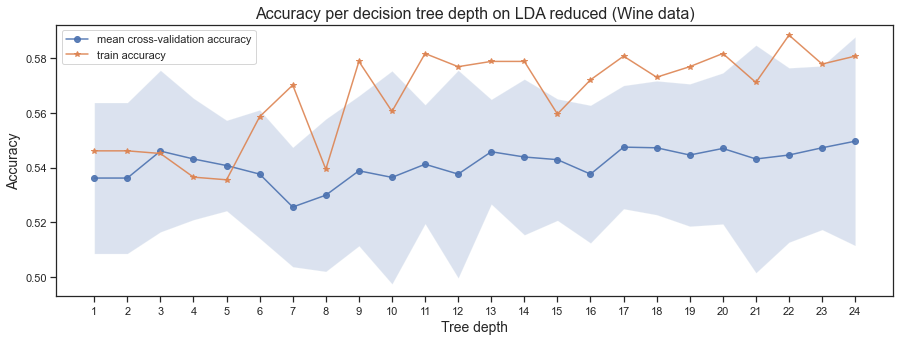

In [211]:
# For LDA data

np.random.seed(27)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X_LDA, y, tree_depths, cv=5, scoring='accuracy'):
    
    X_train, X_test, y_train, y_test = train_test_split(X_LDA,y, test_size=0.2, random_state=27)
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
#          print(X.shape, y.shape, X_pca.shape)
        cv_scores = cross_val_score(tree_model, X_train, y_train, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X_train, y_train).score(X_test, y_test))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on LDA reduced (Wine data)')

max_depth_lda = np.argmax(sm_accuracy_scores)
dt_lda_acc = max(sm_accuracy_scores)*100


Here, we found that when max depth = 22, we get the highest accuracy for the LDA Wine Dataset which is 58.84%.

This is similar to that obtained from PCA reduced and raw Wine data

# 3.3

In [213]:
from sklearn.tree import export_text

X_train, X_test, y_train, y_test = train_test_split(X_raw,y, test_size=0.2)

clf = DecisionTreeClassifier(max_depth=max_depth_raw+1).fit(X_train, y_train)

r = export_text(clf, feature_names=feature_columns)

print(r)

|--- alcohol <= 0.31
|   |--- volatile acidity <= 0.11
|   |   |--- fixed acidity <= 0.24
|   |   |   |--- sulphates <= 0.14
|   |   |   |   |--- residual sugar <= 0.25
|   |   |   |   |   |--- pH <= 0.42
|   |   |   |   |   |   |--- pH <= 0.28
|   |   |   |   |   |   |   |--- citric acid <= 0.09
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |--- citric acid >  0.09
|   |   |   |   |   |   |   |   |--- chlorides <= 0.06
|   |   |   |   |   |   |   |   |   |--- total sulfur dioxide <= 0.28
|   |   |   |   |   |   |   |   |   |   |--- residual sugar <= 0.12
|   |   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |   |   |--- residual sugar >  0.12
|   |   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |--- total sulfur dioxide >  0.28
|   |   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- chlorides >  0.06
|   |   |   |   |   |   |   |   |   |--- volati

We notice from above result that as the value of alcohol concentration and pH increases the quality of wine increases, Whereas the quality decreases with the increase of volatile acidity and chlorides. This is obvious as from the EDA (Bivariate Analysis) in previous assignment we came to know that there is a slight positive linear relationship between those alcohol concentration and pH and the quality.

Overall,

We noticed that for Decision Tree classifier, raw data as well as PCA and LDA reduced dataset all were able to achieve same accuracies.

# 4. Random Forest Classifier

# 4.1 Best settings for the classification raw data

In [221]:
# For raw data
np.random.seed(27)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()


X_train, X_test, y_train, y_test = train_test_split(X_raw,y, test_size=0.2, random_state=27)
param_grid = [
    {'n_estimators' : [3, 5, 25, 50, 300],
    'max_depth': [2, 3, 4, 5, 10,15],}
] 

grid_search_rf_raw = GridSearchCV(rfc, param_grid, cv = 5, refit='accuracy_score', scoring='accuracy', n_jobs=-1)
grid_search_rf_raw.fit(X_train, y_train)
grid_search_rf_raw.best_params_

{'max_depth': 15, 'n_estimators': 300}

In [225]:
np.random.seed(27)

from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_raw,y, test_size=0.2)
rfc = RandomForestClassifier(max_depth=grid_search_rf_raw.best_params_['max_depth'], n_estimators = grid_search_rf_raw.best_params_['n_estimators'])
rf_clf_raw = rfc.fit(X_train, y_train)


rf_clf_raw_acc = accuracy_score(y_test, rf_clf_raw.predict(X_test))*100
rf_clf_raw_acc

68.23076923076923

Here we observed that for raw Wine data the best parameter settings we get is {'max_depth': 15, 'n_estimators': 300} and we get the accuracy of 68.23% on the raw Wine data using the parameter settings we obtained.

# 4.2 Heat plot for raw data

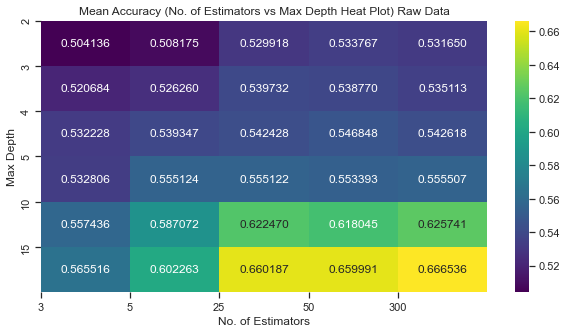

In [226]:
plt.figure(figsize=(10,5))
import seaborn as sns
grid_results_rf_raw = pd.DataFrame(grid_search_rf_raw.cv_results_)
rf_raw_scores = np.array(grid_results_rf_raw["mean_test_score"])
rf_raw_scores = rf_raw_scores.reshape(6,5)

plt.title('Mean Accuracy (No. of Estimators vs Max Depth Heat Plot) Raw Data')
ax = sns.heatmap(rf_raw_scores, annot=True, fmt='f', cmap='viridis')
plt.xticks(np.arange(5), [3, 5, 25, 50, 300])
plt.yticks(np.arange(6), [2, 3, 4, 5, 10,15]);
plt.xlabel('No. of Estimators')
plt.ylabel('Max Depth');

# 4.1 Best settings for the classification pca data

In [227]:
np.random.seed(27)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()


X_train, X_test, y_train, y_test = train_test_split(X_PCA,y, test_size=0.2, random_state=27)
param_grid = [
    {'n_estimators' : [3, 5, 25, 50, 300],
    'max_depth': [2, 3, 4, 5, 10, 15]}
] 

grid_search_rf_pca = GridSearchCV(rfc, param_grid, cv = 5, refit='accuracy_score', scoring='accuracy', n_jobs=-1)
grid_search_rf_pca.fit(X_train, y_train)
grid_search_rf_pca.best_params_

{'max_depth': 15, 'n_estimators': 300}

In [228]:
np.random.seed(27)

from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_PCA,y, test_size=0.2)
rfc = RandomForestClassifier(n_estimators=grid_search_rf_pca.best_params_['n_estimators'], max_depth=grid_search_rf_pca.best_params_['max_depth'])
rf_clf_pca = rfc.fit(X_train, y_train)


accuracy_score(y_test, rf_clf_pca.predict(X_test))


0.6584615384615384

Here we observed that for PCA Wine data the best parameter settings we get is {'max_depth': 15, 'n_estimators': 300} and we get the accuracy of 65.84% on the PCA Wine data using the parameter settings we obtained.

# 4.2 Heat plot for pca data

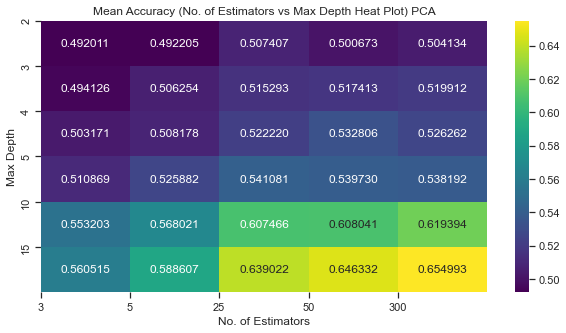

In [229]:
plt.figure(figsize=(10,5))
import seaborn as sns
grid_results_rf_pca = pd.DataFrame(grid_search_rf_pca.cv_results_)
rf_pca_scores = np.array(grid_results_rf_pca["mean_test_score"])
rf_pca_scores = rf_pca_scores.reshape(6,5)

plt.title('Mean Accuracy (No. of Estimators vs Max Depth Heat Plot) PCA')
ax = sns.heatmap(rf_pca_scores, annot=True, fmt='f', cmap='viridis')
plt.xticks(np.arange(5), [3, 5, 25, 50, 300])
plt.yticks(np.arange(6), [2, 3, 4, 5, 10, 15]);
plt.xlabel('No. of Estimators')
plt.ylabel('Max Depth');

# 4.1 Best settings for the classification lda data

In [230]:
np.random.seed(27)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()


X_train, X_test, y_train, y_test = train_test_split(X_LDA,y, test_size=0.2, random_state=27)
param_grid = [
    {'n_estimators' : [3, 5, 25, 100, 300],
    'max_depth': [2, 3, 5, 10, 15],}
] # a list of dictionaries

grid_search_rf_lda = GridSearchCV(rfc, param_grid, cv = 5, refit='accuracy_score', scoring='accuracy', n_jobs=-1)
grid_search_rf_lda.fit(X_train, y_train)
grid_search_rf_lda.best_params_

{'max_depth': 15, 'n_estimators': 300}

In [231]:
np.random.seed(27)

from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_LDA,y, test_size=0.2)
rfc = RandomForestClassifier(n_estimators=grid_search_rf_lda.best_params_['n_estimators'], max_depth=grid_search_rf_lda.best_params_['max_depth'])
rf_clf_lda = rfc.fit(X_train, y_train)


accuracy_score(y_test, rf_clf_lda.predict(X_test))


0.6446153846153846

Here we observed that for LDA Wine data the best parameter settings we get is {'max_depth': 15, 'n_estimators': 300} and we get the accuracy of 64.46% on the LDA Wine data using the parameter settings we obtained.

# 4.2 Heat plot for lda data

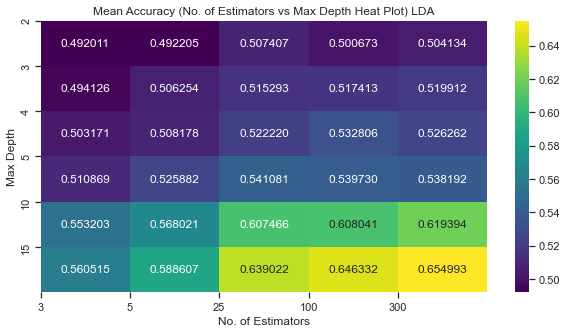

In [232]:
plt.figure(figsize=(10,5))
import seaborn as sns
grid_results_rf_lda = pd.DataFrame(grid_search_rf_lda.cv_results_)
rf_lda_scores = np.array(grid_results_rf_lda["mean_test_score"])
rf_lda_scores = rf_pca_scores.reshape(6,5)

plt.title('Mean Accuracy (No. of Estimators vs Max Depth Heat Plot) LDA')
ax = sns.heatmap(rf_lda_scores, annot=True, fmt='f', cmap='viridis')
plt.xticks(np.arange(5), [3, 5, 25, 100, 300])
plt.yticks(np.arange(6), [2, 3, 4, 5, 10, 15]);
plt.xlabel('No. of Estimators')
plt.ylabel('Max Depth');

Overall, we can notice that for raw data the accuracy of Random Forest Classifier is slightly higher than the PCA and LDA reduced datasets.

# 5. Gradient Tree Boosting

### 5.1 & 5.2

Here we first plot the Mean Accuracy vs No.of estimators Plot and then note the Best settings for classification of the different versions of Wine data.

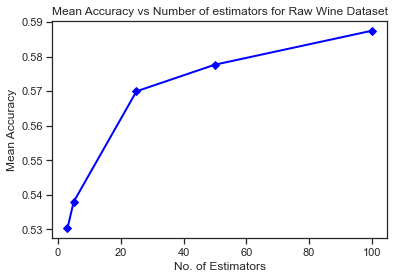

In [233]:
# For raw data
np.random.seed(27)

from sklearn.ensemble import GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(X_raw,y, test_size=0.2)

gbc_raw = GradientBoostingClassifier(max_features = 'auto', random_state = 27)
param_grid = {
    'n_estimators' : [3, 5, 25, 50, 100],
}

grid_search_gbc_raw = GridSearchCV(estimator=gbc_raw, param_grid=param_grid, cv = 5, refit='accuracy_score')
grid_search_gbc_raw.fit(X_train,y_train)
grid_results_gbc_raw = pd.DataFrame(grid_search_gbc_raw.cv_results_)
plt.plot([3, 5, 25, 50, 100], grid_results_gbc_raw['mean_test_score'], 'D-', linewidth=2, color='blue')
plt.title('Mean Accuracy vs Number of estimators for Raw Wine Dataset')
plt.xlabel('No. of Estimators')
plt.ylabel('Mean Accuracy')
plt.show();
gbc_raw_acc = accuracy_score(y_test, grid_search_gbc_raw.predict(X_test))*100

Here we observed that for raw data the GradientBoosting Classifier with n_estimators = 100 is the best parameter setting with mean-accuracy of 58.74% and test set accuracy of 57%

# Plot for pca data

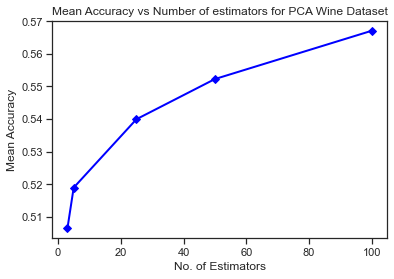

In [236]:
np.random.seed(27)

from sklearn.ensemble import GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(X_PCA,y, test_size=0.2)

gbc_pca = GradientBoostingClassifier(max_features = 'auto', random_state = 27)
param_grid = {
    'n_estimators' : [3, 5, 25, 50, 100],
}

grid_search_gbc_pca = GridSearchCV(estimator=gbc_pca, param_grid=param_grid, cv = 5, refit='accuracy_score')
grid_search_gbc_pca.fit(X_train,y_train)
grid_results_gbc_pca = pd.DataFrame(grid_search_gbc_pca.cv_results_)
plt.plot([3, 5, 25, 50, 100], grid_results_gbc_pca['mean_test_score'], 'D-', linewidth=2, color='blue')
plt.title('Mean Accuracy vs Number of estimators for PCA Wine Dataset')
plt.xlabel('No. of Estimators')
plt.ylabel('Mean Accuracy')
plt.show()

In [237]:
gbc_pca_acc = accuracy_score(y_test, grid_search_gbc_pca.predict(X_test))*100
gbc_pca_acc, grid_search_gbc_pca.best_score_, grid_search_gbc_pca.best_params_

(55.46153846153846, 0.5670543051750945, {'n_estimators': 100})

Here we observed that for PCA data the GradientBoosting Classifier with n_estimators = 100 is the best parameter setting with mean-accuracy of 56.70% and test set accuracy of 55.46%.

# Plot for lda data

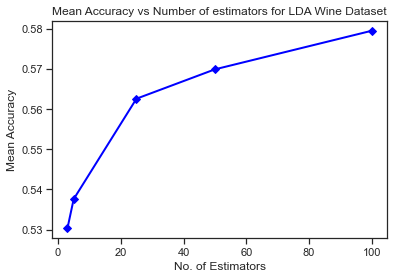

In [238]:
np.random.seed(27)

from sklearn.ensemble import GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(X_LDA,y, test_size=0.2)

gbc_lda = GradientBoostingClassifier(max_features = 'auto', random_state = 27)
param_grid = {
    'n_estimators' : [3, 5, 25, 50, 100],
}

grid_search_gbc_lda = GridSearchCV(estimator=gbc_lda, param_grid=param_grid, cv = 5, refit='accuracy_score')
grid_search_gbc_lda.fit(X_train,y_train)
grid_results_gbc_lda = pd.DataFrame(grid_search_gbc_lda.cv_results_)
plt.plot([3, 5, 25, 50, 100], grid_results_gbc_lda['mean_test_score'], 'D-', linewidth=2, color='blue')
plt.title('Mean Accuracy vs Number of estimators for LDA Wine Dataset')
plt.xlabel('No. of Estimators')
plt.ylabel('Mean Accuracy')
plt.show()

In [239]:
gbc_lda_acc = accuracy_score(y_test, grid_search_gbc_lda.predict(X_test))*100
gbc_lda_acc, grid_search_gbc_lda.best_score_, grid_search_gbc_lda.best_params_

(56.61538461538461, 0.5795600429406974, {'n_estimators': 100})

Here we observed that for LDA data the GradientBoosting Classifier with n_estimators = 100 is the best parameter setting with mean-accuracy of 57.95% and test set accuracy of 56.62%.

Overall, we can notice that for PCA reduced data the accuracy of Gradient Boosted Classifier is slightly lower than the raw and LDA reduced datasets.

# 6. Final Results

In [286]:
final_table_index = ['kNN', 'Multinomial NB', 'Complement NB', 'Decision Tree', 'Random Forest', 'Gradient Boosted Tree']

column = ['wine-raw', 'wine-raw-params', 'wine-pca', 'wine-pca-params', 'wine-lda', 'wine-lda-params']

final_table = pd.DataFrame(columns=column, index=final_table_index)


final_table.loc['kNN'] = [RAW_kNN, "{'weights': 'distance', 'n_neighbors': 40}", PCA_kNN, "{'weights': 'distance', 'n_neighbors': 40}", LDA_kNN, "{'weights': 'distance', 'n_neighbors': 40}"]
final_table.loc['Multinomial NB'] = [mnb_acc_raw,"{'alpha': 1.0, fit_prior': True}", mnb_acc_pca,"{'alpha': 1.0,  'fit_prior': True}", mnb_acc_lda, "{'alpha': 1.0, 'fit_prior': True}"]
final_table.loc['Complement NB'] = [cnb_acc_raw, "{'alpha': 1.0, 'norm': False}", cnb_acc_pca, "{'alpha': 1.0, 'norm': False}", cnb_acc_lda, "{'alpha': 1.0, 'norm': False}"]
final_table.loc['Decision Tree'] = [dt_raw_acc, "{'max_depth'}: 22", dt_pca_acc,"{'max_depth'}: 22", dt_lda_acc, "{'max_depth'}: 22"]
final_table.loc['Random Forest'] = [rf_clf_raw_acc, grid_search_rf_raw.best_params_, rf_clf_pca_acc, grid_search_rf_pca.best_params_,rf_clf_lda_acc, grid_search_rf_lda.best_params_ ]
final_table.loc['Gradient Boosted Tree'] = [gbc_raw_acc, grid_search_gbc_raw.best_params_, gbc_pca_acc, grid_search_gbc_pca.best_params_, gbc_lda_acc, grid_search_gbc_lda.best_params_]

final_table


,wine-raw,wine-raw-params,wine-pca,wine-pca-params,wine-lda,wine-lda-params
kNN,52.615385,"{'weights': 'distance', 'n_neighbors': 40}",55.076923,"{'weights': 'distance', 'n_neighbors': 40}",55.923077,"{'weights': 'distance', 'n_neighbors': 40}"
Multinomial NB,46.076923,"{'alpha': 1.0, fit_prior': True}",43.230769,"{'alpha': 1.0, 'fit_prior': True}",43.230769,"{'alpha': 1.0, 'fit_prior': True}"
Complement NB,42.692308,"{'alpha': 1.0, 'norm': False}",45.769231,"{'alpha': 1.0, 'norm': False}",41.230769,"{'alpha': 1.0, 'norm': False}"
Decision Tree,58.846154,{'max_depth'}: 22,58.846154,{'max_depth'}: 22,58.846154,{'max_depth'}: 22
Random Forest,68.230769,"{'max_depth': 15, 'n_estimators': 300}",65.846154,"{'max_depth': 15, 'n_estimators': 300}",64.461538,"{'max_depth': 15, 'n_estimators': 300}"
Gradient Boosted Tree,57.0,{'n_estimators': 100},55.461538,{'n_estimators': 100},56.615385,{'n_estimators': 100}


We observed the following from the above table,

- For wine-raw dataset Random Forest Classifier resulted in best accuracy.

- For PCA reduced wine dataset Decision Tree resulted in better classification accuracy.

- For LDA reduced wine dataset Decision Tree resulted in better classification accuracy.

It can be noted that, for kNN Classifier Algorithm the PCA and LDA reduced data ie. data with reduced dimensions increased the classification accuracy. Whereas, for other algorithms the classification accuracy remained same for all the different versions of the data (Random Forest Classifier) or decreased for the PCA-LDA reduced datasets for remaining algorithms.

# List of References

1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

2. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html?highlight=naive%20bayes#sklearn.naive_bayes.ComplementNB

3. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html?highlight=multinomial#sklearn.naive_bayes.MultinomialNB

4. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier

5. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search%20cv#sklearn.model_selection.GridSearchCV

6. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighbors#sklearn.neighbors.KNeighborsClassifier

7. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=gradient%20boost#sklearn.ensemble.GradientBoostingClassifier

8. https://medium.com/analytics-vidhya/pca-vs-lda-vs-t-sne-lets-understand-the-difference-between-them-22fa6b9be9d0

9. https://en.wikipedia.org/wiki/Principal_component_analysis

10. https://towardsdatascience.com/how-to-find-decision-tree-depth-via-cross-validation-2bf143f0f3d6

11. https://www.kaggle.com/abedkurdi/abalone-randomforestclassifier

